In [2]:
# Python notebook for Urine Raman spectra (Panc Cancer) Data Set
# https://www.kaggle.com/kritikaaggarwal/complete-analysis-and-prediction-on-tumors
# https://github.com/EBjerrum/Deep-Chemometrics/blob/master/Deep_Chemometrics_with_data_augmentation.py.ipynb

import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
#import seaborn as sns

import sklearn as skl
from scipy.io import loadmat
from scipy import stats

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics 

from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn import svm 

In [3]:
#Load the data
df_i = pd.read_excel('./Prostate_0331_rawdata.xlsx')
df_i.shape

(1902, 80)

In [4]:
df_i.columns

Index(['wavenumber', 'Pro 2', 'Pro 3', 'Pro 4', 'Pro 5', 'Pro 6', 'Pro 11',
       'Pro 12', 'Pro 24', 'Pro 25', 'Pro 26', 'Pro 27', 'Pro 28', 'Pro 32',
       'Pro 33', 'Pro 34', 'Pro 35', 'Pro 36', 'Pro 39', 'Pro 40', 'Pro 19',
       'Pro 20', 'Pro 21', 'Pro 22', 'Pro 23', 'Pro 29', 'Pro 30', 'Pro 31',
       'Pro 37', 'Pro 38', 'Pro 1', 'Pro 7', 'Pro 8', 'Pro 9', 'Pro 10',
       'Pro 14', 'Pro 15', 'Pro 16', 'Pro 17', 'Pro 18', 'Normal 41',
       'Normal 45', 'Normal 46', 'Normal 28', 'Normal 30', 'Normal 31',
       'Normal 51', 'Normal 52', 'Normal 1', 'Normal 2', 'Normal 3',
       'Normal 4', 'Normal 5', 'Normal 6', 'Normal 7', 'Normal 8', 'Normal 9',
       'Normal 10', 'Normal 11', 'Normal 12', 'Normal 13', 'Normal 14',
       'Normal 15', 'Normal 16', 'Normal 18', 'Normal 19', 'Normal 20',
       'Normal 21', 'Normal 22', 'Normal 23', 'Normal 24', 'Normal 25',
       'Normal 26', 'Normal 27', 'Normal 28.1', 'Normal 29', 'Normal 30.1',
       'Normal 31.1', 'Normal 17', 'No

In [5]:
df_i

,wavenumber,Pro 2,Pro 3,Pro 4,Pro 5,Pro 6,Pro 11,Pro 12,Pro 24,Pro 25,...,Normal 24,Normal 25,Normal 26,Normal 27,Normal 28.1,Normal 29,Normal 30.1,Normal 31.1,Normal 17,Normal 32
0,PN,P,P,P,P,P,P,P,P,P,...,N,N,N,N,N,N,N,N,N,N
1,400,291.167,160.067,360.333,251.633,237.8,154.833,357.333,236,319.167,...,642.133,543.767,344.033,457.967,648.067,152.067,747.033,1042.83,827.9,553.4
2,401,289.767,163,360.067,260.333,244.3,153.967,356.367,233.5,319.1,...,643.067,549.867,345.5,447.1,653.367,158.433,756.367,1039.8,829.067,556.133
3,402,286.933,164.767,360.467,260.167,249.1,155.767,345.033,227.833,320.367,...,612.9,568.133,339.867,428.1,646.467,155.267,745.033,1011.4,813.067,555.2
4,403,283.667,166.233,361.1,257.3,253.367,158.267,330.7,221.3,322.133,...,573.667,589.967,332.267,406.8,635.9,149.2,727.433,975.567,791.933,553.233
5,404,280.4,167.533,361.967,253.7,256.967,160.767,318.533,215.7,323.467,...,538.8,609.767,326.233,388.167,625.5,143.133,710.5,942.567,771.5,551.033
6,405,277.133,168.3,363.733,247.5,257.7,162.967,315.933,213.933,322.967,...,523.833,620.5,327.3,381.2,616.233,137.433,697.533,923,755.3,548.133
7,406,273.867,168.333,366.733,237.933,254.8,164.833,325.9,217.333,320.167,...,534.9,619.267,337.633,389.5,608.433,132.167,689.767,920.733,744.467,544.367
8,407,270.633,168.133,370.033,227.3,250.733,166.6,339.733,222.333,316.7,...,554.033,614.333,350.8,402.533,601.133,127.1,683.567,924.067,735.367,540.333
9,408,268.167,167.5,373.167,218,247.733,168.367,353.033,226.533,313.1,...,571.733,609.333,360.9,414.133,594.967,122.867,678.367,928.667,726.5,536.433


In [6]:
y = df_i.iloc[0, 1:] # store the output label
# crop only the intensity values before scaling and data augmentation
df_ij = df_i.drop([0,])
wv = df_ij['wavenumber'] # store the wavenumber
df_ijk = df_ij.drop(['wavenumber'],axis = 1)
df_ijk

,Pro 2,Pro 3,Pro 4,Pro 5,Pro 6,Pro 11,Pro 12,Pro 24,Pro 25,Pro 26,...,Normal 24,Normal 25,Normal 26,Normal 27,Normal 28.1,Normal 29,Normal 30.1,Normal 31.1,Normal 17,Normal 32
1,291.167,160.067,360.333,251.633,237.8,154.833,357.333,236,319.167,267.833,...,642.133,543.767,344.033,457.967,648.067,152.067,747.033,1042.83,827.9,553.4
2,289.767,163,360.067,260.333,244.3,153.967,356.367,233.5,319.1,269.5,...,643.067,549.867,345.5,447.1,653.367,158.433,756.367,1039.8,829.067,556.133
3,286.933,164.767,360.467,260.167,249.1,155.767,345.033,227.833,320.367,271.5,...,612.9,568.133,339.867,428.1,646.467,155.267,745.033,1011.4,813.067,555.2
4,283.667,166.233,361.1,257.3,253.367,158.267,330.7,221.3,322.133,273.567,...,573.667,589.967,332.267,406.8,635.9,149.2,727.433,975.567,791.933,553.233
5,280.4,167.533,361.967,253.7,256.967,160.767,318.533,215.7,323.467,275.433,...,538.8,609.767,326.233,388.167,625.5,143.133,710.5,942.567,771.5,551.033
6,277.133,168.3,363.733,247.5,257.7,162.967,315.933,213.933,322.967,276.433,...,523.833,620.5,327.3,381.2,616.233,137.433,697.533,923,755.3,548.133
7,273.867,168.333,366.733,237.933,254.8,164.833,325.9,217.333,320.167,276.3,...,534.9,619.267,337.633,389.5,608.433,132.167,689.767,920.733,744.467,544.367
8,270.633,168.133,370.033,227.3,250.733,166.6,339.733,222.333,316.7,275.8,...,554.033,614.333,350.8,402.533,601.133,127.1,683.567,924.067,735.367,540.333
9,268.167,167.5,373.167,218,247.733,168.367,353.033,226.533,313.1,275.2,...,571.733,609.333,360.9,414.133,594.967,122.867,678.367,928.667,726.5,536.433
10,269.2,165,375.267,215.167,249.733,170.233,363.3,227.033,309.233,274.133,...,581.367,605.033,356.367,418,593.6,122.767,677.033,938,718.667,533.6


In [7]:
df_P = df_ijk.filter(like = 'Pro', axis = 1)
df_N = df_ijk.filter(like = 'Nor', axis = 1)

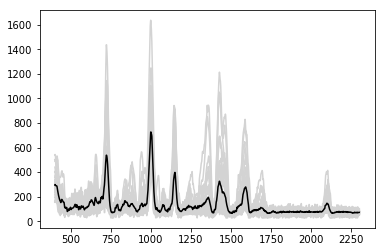

In [8]:
%matplotlib inline
_ = plt.plot(wv, df_P, color='lightgray')
_ = plt.plot(wv, df_P.mean(axis=1), color='black')

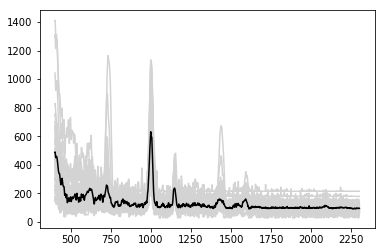

In [9]:
%matplotlib inline
_ = plt.plot(wv, df_N, color='lightgray')
_ = plt.plot(wv, df_N.mean(axis=1), color='black')

In [10]:
# Ramsn shift range selection
wv_c = wv[(wv >= 450) & (wv <= 2150)]
df_ijkc = df_ijk[(df_ij['wavenumber'] >= 450) & (df_ij['wavenumber'] <= 2150) ]

In [11]:
df_ijkc.index = wv_c

In [12]:
df_ijkc

,Pro 2,Pro 3,Pro 4,Pro 5,Pro 6,Pro 11,Pro 12,Pro 24,Pro 25,Pro 26,...,Normal 24,Normal 25,Normal 26,Normal 27,Normal 28.1,Normal 29,Normal 30.1,Normal 31.1,Normal 17,Normal 32
wavenumber,,,,,,,,,,,,,,,,,,,,,
450,153.167,119.1,159.267,216.633,161.9,103.633,194.533,127.5,132.733,220.267,...,257.067,303,242.7,144.267,434.567,192.367,559.733,284.7,325.433,145.4
451,157.7,111.567,167.633,213.333,157.2,101.9,196.433,126.433,133.333,203.667,...,266.167,297.9,236.367,140.2,440.6,191.333,554.767,260.667,330.133,152.533
452,162,103.667,176.667,209.867,152.467,100.2,198.833,125.267,134.4,186.4,...,277.8,293.9,229.967,136.333,447.067,189.733,549.2,237.933,336.533,161.467
453,166.267,96.5667,182.1,208,150.3,99.4667,200.967,122.367,137.9,171.667,...,289.4,288.367,225.267,131.7,452.333,188.133,543.367,223.167,339.1,167.533
454,170.3,92,176.8,210.667,156,101.7,202.3,114.5,148.433,164.767,...,300.733,278.367,225.633,124.833,453.867,186.7,536.6,231.867,330.367,164.633
455,174.267,88.9,165.367,215.933,166.067,105.667,203.033,103.633,163.033,162.2,...,311.9,265.833,228.867,116.6,453.4,185.333,529.367,253.933,315.133,156.733
456,177.9,86.0667,152.833,221.5,176.8,109.8,203.7,92.4,177.933,160.433,...,322.667,252.767,232.5,108.267,452.267,184.067,521.967,277.867,298.6,147.967
457,176.5,83.6667,140.733,223.6,184.533,111.233,202.433,82.7,184.267,158.867,...,325.333,239.167,233.333,101.9,446.6,183.4,512.433,292.067,279.667,140.2
458,160.133,82.5667,130.3,215.233,183.1,104.667,195.533,77.7667,165.3,157.633,...,304,223.867,225.767,101.5,427.433,184.567,496.8,276.667,253.9,135.533


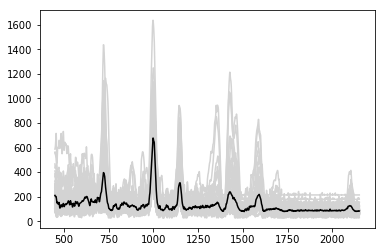

In [13]:
%matplotlib inline
_ = plt.plot(wv_c, df_ijkc, color='lightgray')
_ = plt.plot(wv_c, df_ijkc.mean(axis=1), color='black')

In [14]:
# Normalization by MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df_ijkc)
df_scaled = scaler.transform(df_ijkc)

In [15]:
df_scaled = pd.DataFrame(df_scaled, columns = df_ijkc.columns , index = df_ijkc.index)

In [16]:
df_scaled

,Pro 2,Pro 3,Pro 4,Pro 5,Pro 6,Pro 11,Pro 12,Pro 24,Pro 25,Pro 26,...,Normal 24,Normal 25,Normal 26,Normal 27,Normal 28.1,Normal 29,Normal 30.1,Normal 31.1,Normal 17,Normal 32
wavenumber,,,,,,,,,,,,,,,,,,,,,
450,0.127357,0.123484,0.164392,0.242727,0.160014,0.086731,0.232703,0.143805,0.142210,0.273459,...,0.338527,0.324303,0.334608,0.109257,0.946606,0.168156,1.000000,0.266585,0.372483,0.113065
451,0.135103,0.110175,0.181693,0.237231,0.153166,0.084183,0.235981,0.141639,0.143342,0.244398,...,0.357951,0.314882,0.322294,0.098867,0.963298,0.166941,0.989354,0.211669,0.382587,0.139194
452,0.142450,0.096220,0.200372,0.231457,0.146270,0.081684,0.240122,0.139270,0.145355,0.214169,...,0.382782,0.307493,0.309851,0.088989,0.981188,0.165060,0.977422,0.159723,0.396345,0.171917
453,0.149741,0.083677,0.211607,0.228348,0.143114,0.080606,0.243803,0.133383,0.151959,0.188375,...,0.407542,0.297272,0.300713,0.077152,0.995758,0.163179,0.964919,0.125981,0.401863,0.194139
454,0.156633,0.075609,0.200648,0.232789,0.151418,0.083889,0.246103,0.117412,0.171835,0.176296,...,0.431732,0.278801,0.301426,0.059610,1.000000,0.161494,0.950414,0.145860,0.383089,0.183516
455,0.163411,0.070133,0.177006,0.241561,0.166084,0.089720,0.247369,0.095351,0.199384,0.171802,...,0.455567,0.255649,0.307712,0.038576,0.998709,0.159887,0.934910,0.196283,0.350340,0.154579
456,0.169619,0.065128,0.151089,0.250833,0.181721,0.095796,0.248519,0.072545,0.227499,0.168709,...,0.478549,0.231513,0.314776,0.017287,0.995574,0.158398,0.919048,0.250971,0.314798,0.122466
457,0.167227,0.060888,0.126068,0.254330,0.192988,0.097903,0.246333,0.052852,0.239449,0.165966,...,0.484240,0.206391,0.316397,0.001022,0.979897,0.157614,0.898614,0.283418,0.274095,0.094017
458,0.139261,0.058945,0.104494,0.240395,0.190899,0.088250,0.234428,0.042837,0.203661,0.163807,...,0.438705,0.178129,0.301685,0.000000,0.926872,0.158986,0.865104,0.248229,0.218703,0.076923


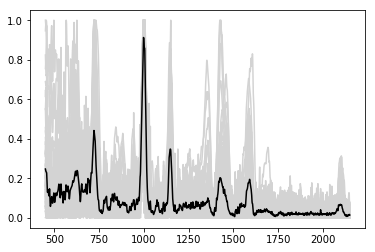

In [17]:
%matplotlib inline
_ = plt.plot(wv_c, df_scaled, color='lightgray')
_ = plt.plot(wv_c, df_scaled.mean(axis=1), color='black')

In [18]:
# Convert the dataframe into Tidy format

In [19]:
df = df_scaled.T
df.columns = wv_c.astype(str) + ' cm-1'

In [20]:
df.insert(0,'Class', y)
df

wavenumber,Class,450 cm-1,451 cm-1,452 cm-1,453 cm-1,454 cm-1,455 cm-1,456 cm-1,457 cm-1,458 cm-1,...,2141 cm-1,2142 cm-1,2143 cm-1,2144 cm-1,2145 cm-1,2146 cm-1,2147 cm-1,2148 cm-1,2149 cm-1,2150 cm-1
Pro 2,P,0.127357,0.135103,0.142450,0.149741,0.156633,0.163411,0.169619,0.167227,0.139261,...,0.000000,0.000000,0.002563,0.023523,0.029447,0.009056,0.000000,0.007632,0.018454,0.019536
Pro 3,P,0.123484,0.110175,0.096220,0.083677,0.075609,0.070133,0.065128,0.060888,0.058945,...,0.038276,0.034507,0.027146,0.016311,0.000000,0.006595,0.009481,0.000000,0.000000,0.009716
Pro 4,P,0.164392,0.181693,0.200372,0.211607,0.200648,0.177006,0.151089,0.126068,0.104494,...,0.002206,0.006824,0.000000,0.000000,0.000000,0.005652,0.008823,0.012062,0.025986,0.028122
Pro 5,P,0.242727,0.237231,0.231457,0.228348,0.232789,0.241561,0.250833,0.254330,0.240395,...,0.000500,0.003498,0.000000,0.003054,0.001055,0.000000,0.000000,0.005385,0.008272,0.000000
Pro 6,P,0.160014,0.153166,0.146270,0.143114,0.151418,0.166084,0.181721,0.192988,0.190899,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000728,0.005002,0.007236,0.008304,0.008304
Pro 11,P,0.086731,0.084183,0.081684,0.080606,0.083889,0.089720,0.095796,0.097903,0.088250,...,0.003822,0.006370,0.000000,0.000000,0.000000,0.006811,0.014259,0.017101,0.024990,0.018914
Pro 12,P,0.232703,0.235981,0.240122,0.243803,0.246103,0.247369,0.248519,0.246333,0.234428,...,0.004486,0.004486,0.000000,0.007822,0.009432,0.000000,0.000000,0.005464,0.012078,0.018577
Pro 24,P,0.143805,0.141639,0.139270,0.133383,0.117412,0.095351,0.072545,0.052852,0.042837,...,0.000000,0.000000,0.003993,0.014617,0.017663,0.014685,0.021182,0.019219,0.013264,0.009203
Pro 25,P,0.142210,0.143342,0.145355,0.151959,0.171835,0.199384,0.227499,0.239449,0.203661,...,0.019624,0.026920,0.019624,0.019624,0.019624,0.019624,0.021574,0.022643,0.019624,0.019624
Pro 26,P,0.273459,0.244398,0.214169,0.188375,0.176296,0.171802,0.168709,0.165966,0.163807,...,0.004727,0.014414,0.012080,0.000000,0.000000,0.000000,0.001342,0.000700,0.005486,0.008345


In [21]:
df.reset_index(inplace = True)
df.index = df.index +1
df.rename(columns = {'index': 'SampleID'}, inplace = True)
df.index.name = 'Idx'
df.insert(1,'SampleType','Sample')

In [22]:
df

wavenumber,SampleID,SampleType,Class,450 cm-1,451 cm-1,452 cm-1,453 cm-1,454 cm-1,455 cm-1,456 cm-1,...,2141 cm-1,2142 cm-1,2143 cm-1,2144 cm-1,2145 cm-1,2146 cm-1,2147 cm-1,2148 cm-1,2149 cm-1,2150 cm-1
Idx,,,,,,,,,,,,,,,,,,,,,
1,Pro 2,Sample,P,0.127357,0.135103,0.142450,0.149741,0.156633,0.163411,0.169619,...,0.000000,0.000000,0.002563,0.023523,0.029447,0.009056,0.000000,0.007632,0.018454,0.019536
2,Pro 3,Sample,P,0.123484,0.110175,0.096220,0.083677,0.075609,0.070133,0.065128,...,0.038276,0.034507,0.027146,0.016311,0.000000,0.006595,0.009481,0.000000,0.000000,0.009716
3,Pro 4,Sample,P,0.164392,0.181693,0.200372,0.211607,0.200648,0.177006,0.151089,...,0.002206,0.006824,0.000000,0.000000,0.000000,0.005652,0.008823,0.012062,0.025986,0.028122
4,Pro 5,Sample,P,0.242727,0.237231,0.231457,0.228348,0.232789,0.241561,0.250833,...,0.000500,0.003498,0.000000,0.003054,0.001055,0.000000,0.000000,0.005385,0.008272,0.000000
5,Pro 6,Sample,P,0.160014,0.153166,0.146270,0.143114,0.151418,0.166084,0.181721,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000728,0.005002,0.007236,0.008304,0.008304
6,Pro 11,Sample,P,0.086731,0.084183,0.081684,0.080606,0.083889,0.089720,0.095796,...,0.003822,0.006370,0.000000,0.000000,0.000000,0.006811,0.014259,0.017101,0.024990,0.018914
7,Pro 12,Sample,P,0.232703,0.235981,0.240122,0.243803,0.246103,0.247369,0.248519,...,0.004486,0.004486,0.000000,0.007822,0.009432,0.000000,0.000000,0.005464,0.012078,0.018577
8,Pro 24,Sample,P,0.143805,0.141639,0.139270,0.133383,0.117412,0.095351,0.072545,...,0.000000,0.000000,0.003993,0.014617,0.017663,0.014685,0.021182,0.019219,0.013264,0.009203
9,Pro 25,Sample,P,0.142210,0.143342,0.145355,0.151959,0.171835,0.199384,0.227499,...,0.019624,0.026920,0.019624,0.019624,0.019624,0.019624,0.021574,0.022643,0.019624,0.019624


In [28]:
wavenumber = df.columns[3:]
wavenumber

Index(['450 cm-1', '451 cm-1', '452 cm-1', '453 cm-1', '454 cm-1', '455 cm-1',
       '456 cm-1', '457 cm-1', '458 cm-1', '459 cm-1',
       ...
       '2141 cm-1', '2142 cm-1', '2143 cm-1', '2144 cm-1', '2145 cm-1',
       '2146 cm-1', '2147 cm-1', '2148 cm-1', '2149 cm-1', '2150 cm-1'],
      dtype='object', name='wavenumber', length=1701)

In [29]:
df_peak = pd.DataFrame()
df_peak['Name'] = wavenumber
df_peak['Label'] = wavenumber
df_peak['Perc_missing'] = 0.
df_peak['QC_RSD'] = 0.

In [32]:
df_peak.index = df_peak.index + 1
df_peak

,Name,Label,Perc_missing,QC_RSD
1,450 cm-1,450 cm-1,0.0,0.0
2,451 cm-1,451 cm-1,0.0,0.0
3,452 cm-1,452 cm-1,0.0,0.0
4,453 cm-1,453 cm-1,0.0,0.0
5,454 cm-1,454 cm-1,0.0,0.0
6,455 cm-1,455 cm-1,0.0,0.0
7,456 cm-1,456 cm-1,0.0,0.0
8,457 cm-1,457 cm-1,0.0,0.0
9,458 cm-1,458 cm-1,0.0,0.0
10,459 cm-1,459 cm-1,0.0,0.0


In [36]:
df_peak.index.name = 'Idx'
df_peak

,Name,Label,Perc_missing,QC_RSD
Idx,,,,
1,450 cm-1,450 cm-1,0.0,0.0
2,451 cm-1,451 cm-1,0.0,0.0
3,452 cm-1,452 cm-1,0.0,0.0
4,453 cm-1,453 cm-1,0.0,0.0
5,454 cm-1,454 cm-1,0.0,0.0
6,455 cm-1,455 cm-1,0.0,0.0
7,456 cm-1,456 cm-1,0.0,0.0
8,457 cm-1,457 cm-1,0.0,0.0
9,458 cm-1,458 cm-1,0.0,0.0


In [37]:
# write the dataset to excel file
with pd.ExcelWriter('./Pros_Tidy.xlsx') as writer:
    df.to_excel(writer,sheet_name="Data")
    df_peak.to_excel(writer,sheet_name="Peak")

In [50]:
## End of data setup to Tidy format

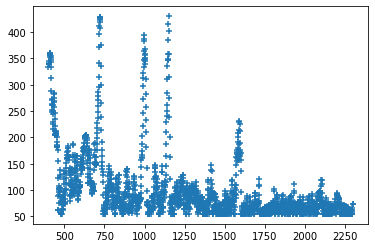

In [62]:
df_j = df_i.drop([0])
plt.scatter(df_j['wavenumber'], df_j['pro 19'], marker="+")

In [63]:
# How to reduce the dataset without loosing the key features
# Python spectroscopic data reduction module


In [339]:
from ChemUtils import GlobalStandardScaler 
xscaler = GlobalStandardScaler() #It works on a global scale, not per feature as is otherwise the norm for scikit-learn scalers.

df_s = xscaler.fit_transform(df)

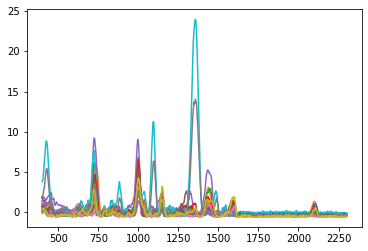

In [340]:
%matplotlib inline
_ = plt.plot(df_j['wavenumber'], df_s.T)

In [341]:
df_s.shape

(39, 1901)

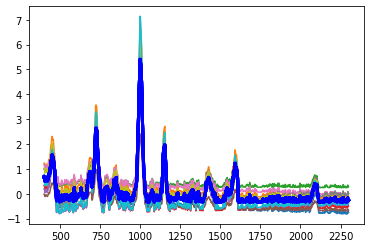

In [379]:
#Augmentation for all Spectra (X10)
X = df_s[0:1]
#Repeating the spectrum 10x
X = np.repeat(X, repeats=10, axis=0)
#Augment (Large pertubations for illustration)
X_aug = dataaugment(X, betashift = 0.5, slopeshift = 0.5,multishift = 0.5)
    
plt.plot(df_j['wavenumber'], X_aug.T)
_= plt.plot(df_j['wavenumber'], X.T, lw=3, c='b')

390


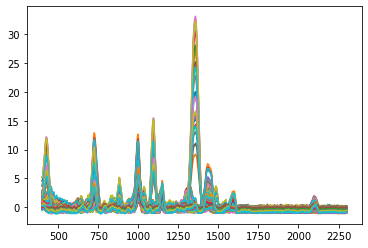

In [380]:
# data augmentation
# The idea is to simulate the expected form of irrelevant noise (here baseline offset and slope and overall spectrum intensity)
from ChemUtils import dataaugment

#Repeating the spectrum 10x
X = np.repeat(df_s, repeats=10, axis=0)
#Augment (with 40% for offset and multiplication, 20% of slopeshift)
X_aug = dataaugment(X, betashift = 0.4, slopeshift = 0.2,multishift = 0.4)
y_aug = np.repeat(y, repeats=10)
    
print(len(X_aug))
_= plt.plot(df_j['wavenumber'], X_aug.T)

In [381]:
type(X_aug)
df_x = pd.DataFrame(X_aug) # convert to pd.DataFrame
df_y = y_aug

In [382]:
df_x

,0,1,2,3,4,5,6,7,8,9,...,1891,1892,1893,1894,1895,1896,1897,1898,1899,1900
0,0.543335,0.542685,0.494366,0.432208,0.376201,0.351168,0.365894,0.392923,0.42039,0.445661,...,-0.542851,-0.553386,-0.576443,-0.472749,-0.411013,-0.444833,-0.505014,-0.536638,-0.535531,-0.524538
1,0.534722,0.534027,0.489793,0.432918,0.381661,0.358695,0.372045,0.396631,0.421619,0.4446,...,-0.648388,-0.658111,-0.679272,-0.584661,-0.528374,-0.559365,-0.614435,-0.64342,-0.64251,-0.63257
2,0.965621,0.964979,0.914744,0.85011,0.791876,0.765866,0.781222,0.809376,0.837987,0.864312,...,-0.0996452,-0.110572,-0.134525,-0.0266104,0.0376528,0.00250114,-0.0600754,-0.0929417,-0.0917555,-0.080285
3,0.753673,0.752969,0.703173,0.639126,0.581413,0.555597,0.570728,0.598528,0.62678,0.65277,...,-0.431184,-0.442068,-0.465848,-0.359096,-0.295553,-0.330417,-0.392428,-0.425031,-0.423925,-0.41264
4,0.64544,0.644728,0.587494,0.513851,0.447501,0.417876,0.435396,0.467502,0.500129,0.530151,...,-0.532619,-0.545052,-0.572333,-0.449324,-0.376065,-0.416108,-0.487407,-0.524845,-0.523474,-0.510383
5,0.616838,0.616166,0.574312,0.520502,0.472006,0.450269,0.462882,0.486122,0.509743,0.531465,...,-0.529401,-0.538613,-0.558642,-0.469168,-0.415942,-0.44527,-0.497372,-0.524803,-0.523956,-0.514569
6,0.671104,0.670495,0.620006,0.555035,0.496501,0.470378,0.48586,0.514214,0.543028,0.569544,...,-0.32966,-0.340612,-0.364667,-0.25609,-0.191416,-0.226735,-0.289636,-0.322656,-0.321425,-0.309851
7,0.261043,0.260589,0.231489,0.194071,0.16035,0.145243,0.154031,0.170212,0.186656,0.201781,...,-0.510014,-0.516408,-0.530327,-0.468073,-0.431034,-0.451421,-0.487651,-0.506718,-0.506115,-0.499572
8,0.544763,0.543954,0.48864,0.417501,0.353396,0.324706,0.341478,0.372317,0.403657,0.432486,...,-0.822511,-0.834624,-0.861053,-0.742555,-0.672031,-0.710768,-0.779646,-0.815871,-0.814671,-0.802169
9,0.14838,0.148128,0.122752,0.0900817,0.0606532,0.04755,0.0554035,0.0697407,0.0843095,0.0977205,...,-0.251414,-0.256876,-0.268937,-0.214191,-0.181561,-0.199295,-0.230923,-0.2475,-0.246825,-0.24094


In [383]:
display(y_aug)

n 41      N
n 41      N
n 41      N
n 41      N
n 41      N
n 41      N
n 41      N
n 41      N
n 41      N
n 41      N
n 45      N
n 45      N
n 45      N
n 45      N
n 45      N
n 45      N
n 45      N
n 45      N
n 45      N
n 45      N
n 46      N
n 46      N
n 46      N
n 46      N
n 46      N
n 46      N
n 46      N
n 46      N
n 46      N
n 46      N
         ..
pan 28    P
pan 28    P
pan 28    P
pan 28    P
pan 28    P
pan 28    P
pan 28    P
pan 28    P
pan 28    P
pan 28    P
pan 31    P
pan 31    P
pan 31    P
pan 31    P
pan 31    P
pan 31    P
pan 31    P
pan 31    P
pan 31    P
pan 31    P
pan 35    P
pan 35    P
pan 35    P
pan 35    P
pan 35    P
pan 35    P
pan 35    P
pan 35    P
pan 35    P
pan 35    P
Name: 0, Length: 390, dtype: object

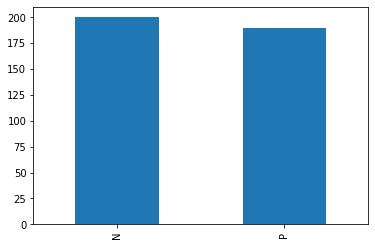

In [384]:
df_y.value_counts().plot(kind ="bar")

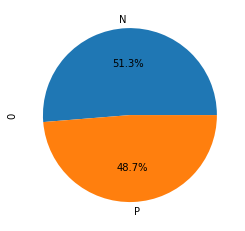

In [385]:
y.value_counts().plot(kind ="pie",autopct='%1.1f%%')

In [386]:
# Classification Analysis
# split the data now
xtrain,xtest,ytrain,ytest = train_test_split(df_x,df_y,test_size = 0.3,random_state = 1)

In [387]:
# FITTING & TESTING THE CLASSIFICATION MODELS (without scaling the data)
print('Classification without scaling')
#decision tree
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
print('DECISION TREE CLASSIFIER:: ',metrics.accuracy_score(ypred,ytest))

#random forest
model=RandomForestClassifier(n_estimators=100)
model.fit(xtrain,ytrain)# now fit our model for traiing data
prediction=model.predict(xtest)# predict for the test data
print('FORSEST TREE CLASSIFICATION:: ',metrics.accuracy_score(prediction,ytest))

#SVM
model = svm.SVC()
model.fit(xtrain,ytrain)# now fit our model for traiing data
prediction=model.predict(xtest)# predict for the test data
metrics.accuracy_score(prediction,ytest)
print('SUPPORT VECTOR MACHINE:: ',metrics.accuracy_score(prediction,ytest))

#knn
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)
print('K NEAREST NEIGHBOURS:: ',metrics.accuracy_score(ypred,ytest))

#naive bayes
NB = GaussianNB()
NB.fit(xtrain,ytrain)
ypred = NB.predict(xtest)
print('NAIVE BAYES ALGORITHM:: ',metrics.accuracy_score(ypred,ytest))

#logistic regression
LR = LogisticRegression()
LR.fit(xtrain,ytrain)
ypred = LR.predict(xtest)
print('LOGISTIC REGRESSION:: ',metrics.accuracy_score(ypred,ytest))

#PLS Discriminant Analysis
binary_ytrain = (ytrain == 'N').astype('uint8') # assign 'P' to 0, 'N' to 1
binary_ytest = (ytest == 'N').astype('uint8')
PLS = PLSRegression(n_components=5)
PLS.fit(xtrain,binary_ytrain)
ypred = PLS.predict(xtest) # these won't generally be integer numbers
binary_ypred = (PLS.predict(xtest) > 0.5).astype('uint8')
print('PLS-DA:: ',metrics.accuracy_score(binary_ypred,binary_ytest))

Classification without scaling
DECISION TREE CLASSIFIER::  0.9316239316239316
FORSEST TREE CLASSIFICATION::  0.9401709401709402
SUPPORT VECTOR MACHINE::  0.8632478632478633


C:\Users\aslan\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


K NEAREST NEIGHBOURS::  0.9230769230769231
NAIVE BAYES ALGORITHM::  0.6495726495726496
LOGISTIC REGRESSION::  1.0
PLS-DA::  0.9487179487179487


C:\Users\aslan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [388]:
# FITTING & TESTING THE CLASSIFICATION MODELS AFTER SCALING
sc = StandardScaler()
df_x = sc.fit_transform(df_x)
xtrain,xtest,ytrain,ytest = train_test_split(df_x,df_y,test_size = 0.3,random_state = 1)

print('Classification after scaling')

#decision tree
dt = DecisionTreeClassifier()
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
print('DECISION TREE CLASSIFIER:: ',metrics.accuracy_score(ypred,ytest))

#random forest
model=RandomForestClassifier(n_estimators=100)
model.fit(xtrain,ytrain)# now fit our model for traiing data
prediction=model.predict(xtest)# predict for the test data
print('FORSEST TREE CLASSIFICATION:: ',metrics.accuracy_score(prediction,ytest))


#SVM
model = svm.SVC()
model.fit(xtrain,ytrain)# now fit our model for traiing data
prediction=model.predict(xtest)# predict for the test data
metrics.accuracy_score(prediction,ytest)
print('SUPPORT VECTOR MACHINE:: ',metrics.accuracy_score(prediction,ytest))

#knn
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)
print('K NEAREST NEIGHBOURS:: ',metrics.accuracy_score(ypred,ytest))

#naive bayes
NB = GaussianNB()
NB.fit(xtrain,ytrain)
ypred = NB.predict(xtest)
print('NAIVE BAYES ALGORITHM:: ',metrics.accuracy_score(ypred,ytest))

#logistic regression
LR = LogisticRegression()
LR.fit(xtrain,ytrain)
ypred = LR.predict(xtest)
print('LOGISTIC REGRESSION:: ',metrics.accuracy_score(ypred,ytest))

#PLS Discriminant Analysis
binary_ytrain = (ytrain == 'N').astype('uint8') # assign 'P' to 0, 'N' to 1
binary_ytest = (ytest == 'N').astype('uint8')
PLS = PLSRegression(n_components=5)
PLS.fit(xtrain,binary_ytrain)
ypred = PLS.predict(xtest) # these won't generally be integer numbers
binary_ypred = (PLS.predict(xtest) > 0.5).astype('uint8')
print('PLS-DA:: ',metrics.accuracy_score(binary_ypred,binary_ytest))

Classification after scaling
DECISION TREE CLASSIFIER::  0.9316239316239316
FORSEST TREE CLASSIFICATION::  0.9316239316239316
SUPPORT VECTOR MACHINE::  0.9316239316239316


C:\Users\aslan\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


K NEAREST NEIGHBOURS::  0.8974358974358975
NAIVE BAYES ALGORITHM::  0.6495726495726496
LOGISTIC REGRESSION::  1.0
PLS-DA::  0.9487179487179487


C:\Users\aslan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [389]:
#SVM
model = svm.SVC()
model.fit(xtrain,ytrain)# now fit our model for traiing data
prediction=model.predict(xtest)# predict for the test data
metrics.accuracy_score(prediction,ytest)
print('SUPPORT VECTOR MACHINE:: ',metrics.accuracy_score(prediction,ytest))
metrics.confusion_matrix(ytest,prediction)

SUPPORT VECTOR MACHINE::  0.9316239316239316


C:\Users\aslan\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


array([[53,  2],
       [ 6, 56]], dtype=int64)

In [390]:
#logistic regression
LR = LogisticRegression()
LR.fit(xtrain,ytrain)
ypred = LR.predict(xtest)
print('LOGISTIC REGRESSION:: ',metrics.accuracy_score(ypred,ytest))
metrics.confusion_matrix(ytest,ypred)

LOGISTIC REGRESSION::  1.0


C:\Users\aslan\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([[55,  0],
       [ 0, 62]], dtype=int64)

In [391]:
#PLS Discriminant Analysis
binary_ytrain = (ytrain == 'N').astype('uint8') # assign 'P' to 0, 'N' to 1
binary_ytest = (ytest == 'N').astype('uint8')
PLS = PLSRegression(n_components=5)
PLS.fit(xtrain,binary_ytrain)
ypred = PLS.predict(xtest) # these won't generally be integer numbers
binary_ypred = (PLS.predict(xtest) > 0.5).astype('uint8')
print('PLS-DA:: ',metrics.accuracy_score(binary_ypred,binary_ytest))
metrics.confusion_matrix(binary_ytest,binary_ypred)

PLS-DA::  0.9487179487179487


array([[56,  6],
       [ 0, 55]], dtype=int64)

In [ ]:
# Convolutional Neural Network algorithm
